https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=E17FA27201BF89C0318A2F1AC6A71E4F

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('causes_of_death.tsv', delimiter = '\t')
print(len(df))
df.head()

4115


,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


In [3]:
df.tail()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
4110,NaN,Wyoming,56,85+ years,85+,Female,F,White,2106-3,13140,95575,13748.4
4111,NaN,Wyoming,56,85+ years,85+,Male,M,American Indian or Alaska Native,1002-5,41,356,11516.9
4112,NaN,Wyoming,56,85+ years,85+,Male,M,Asian or Pacific Islander,A-PI,12,244,Unreliable
4113,NaN,Wyoming,56,85+ years,85+,Male,M,Black or African American,2054-5,32,454,7048.5
4114,NaN,Wyoming,56,85+ years,85+,Male,M,White,2106-3,7982,49954,15978.7


In [21]:
df['State']=='Wyoming'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4085     True
4086     True
4087     True
4088     True
4089     True
4090     True
4091     True
4092     True
4093     True
4094     True
4095     True
4096     True
4097     True
4098     True
4099     True
4100     True
4101     True
4102     True
4103     True
4104     True
4105     True
4106     True
4107     True
4108     True
4109     True
4110     True
4111     True
4112     True
4113     True
4114     True
Name: State, Length: 4115, dtype: bool

In [6]:
%matplotlib inline

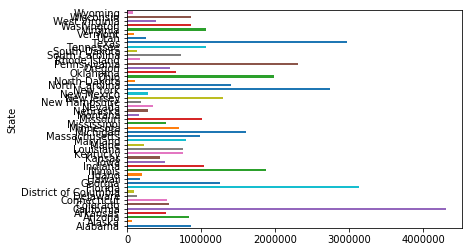

In [7]:
df.groupby('State')['Deaths'].sum().plot(kind='barh')

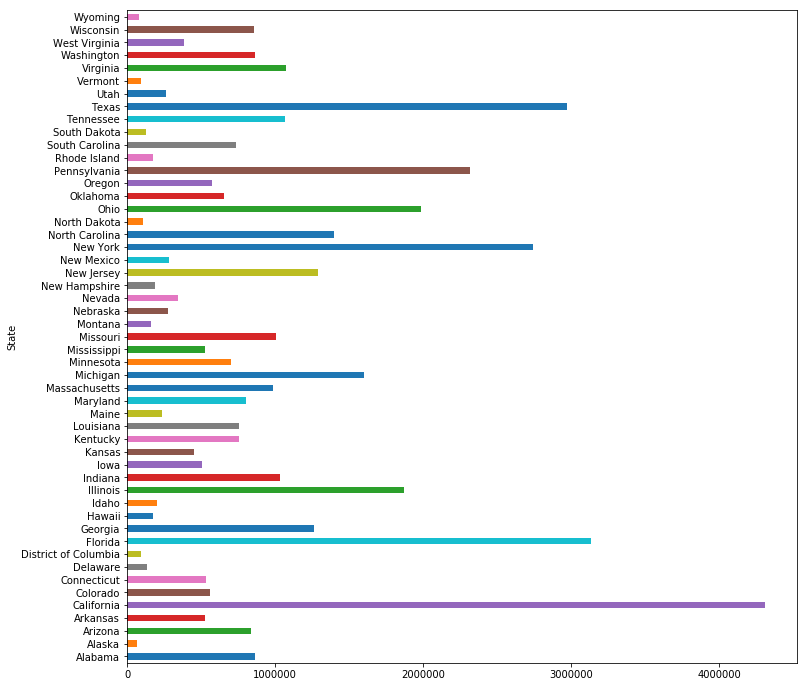

In [8]:
df.groupby('State')['Deaths'].sum().plot(kind='barh', figsize = (12,12))

In [10]:
grouped = df.groupby('State')['Deaths'].sum().reset_index()
grouped.head(2)

,State,Deaths
0,Alabama,860780
1,Alaska,63334


In [11]:
grouped = grouped.sort_values(by='Deaths', ascending=False)
grouped.head()

,State,Deaths
4,California,4307061
9,Florida,3131111
43,Texas,2969214
32,New York,2741575
38,Pennsylvania,2313855


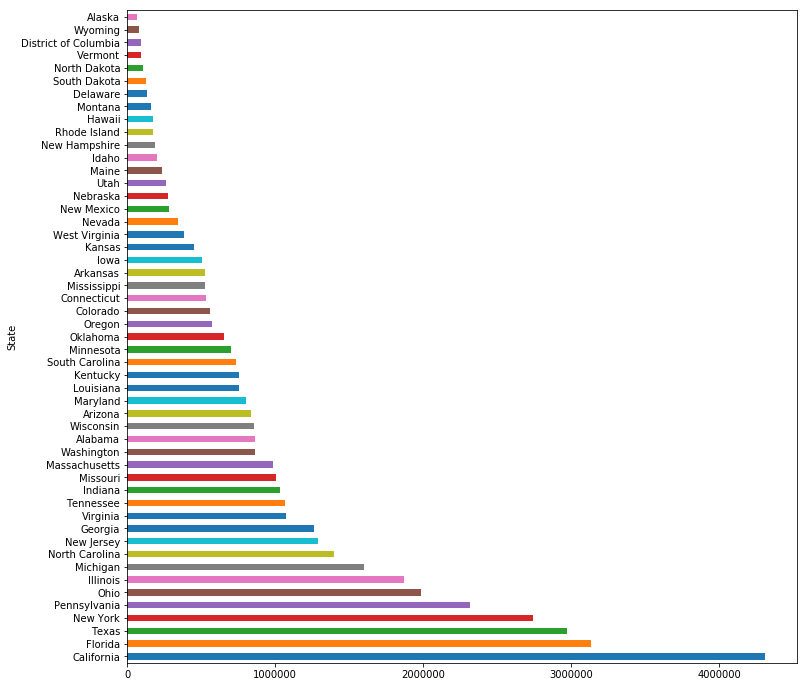

In [12]:
grouped.set_index('State')['Deaths'].plot(kind='barh', figsize=(12,12))

In [13]:
grouped = df.groupby(['Gender', 'Race'])['Deaths'].sum().reset_index()
grouped.head()

,Gender,Race,Deaths
0,Female,American Indian or Alaska Native,120827
1,Female,Asian or Pacific Islander,417760
2,Female,Black or African American,2601979
3,Female,White,19427767
4,Male,American Indian or Alaska Native,145492


In [16]:
pivot = grouped.pivot(index='Race', columns='Gender', values='Deaths')
pivot.head()

Gender,Female,Male
Race,,
American Indian or Alaska Native,120827,145492
Asian or Pacific Islander,417760,455506
Black or African American,2601979,2708957
White,19427767,19034672


In [17]:
pivot.index.Name=None
pivot.head()

Gender,Female,Male
Race,,
American Indian or Alaska Native,120827,145492
Asian or Pacific Islander,417760,455506
Black or African American,2601979,2708957
White,19427767,19034672


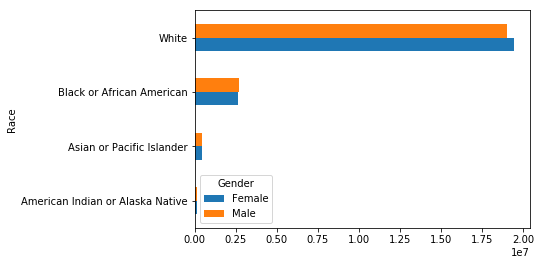

In [19]:
pivot.plot(kind='barh')

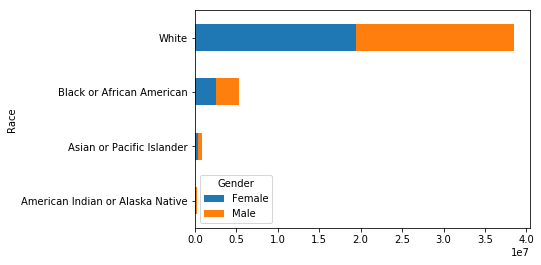

In [20]:
pivot.plot(kind='barh', stacked=True)